In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('C:\\Users\\douaa\\OneDrive\\Desktop\\downtest\\OnlineRetail.csv')

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [22]:
df.drop(columns= [ 'StockCode','Description'], inplace=True)

In [23]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,581587,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,4,12/9/2011 12:50,4.15,12680.0,France


In [24]:
missing_values = df.isnull().sum()

In [25]:
df.shape

(541909, 6)

In [26]:
missing_values

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
#df.fillna(0, inplace=True) 

In [28]:
df.dropna(inplace=True)

In [29]:
missing_values = df.isnull().sum()
missing_values

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)
df = df[df['Quantity'] > 0]

In [16]:
df.shape

(247464, 6)

In [33]:
df.loc[:, 'TotalPrice'] = df['Quantity'] * df['UnitPrice']

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\159740024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [34]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,15.30
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,25.50
...,...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,France,2011-12,15.60
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60


In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.loc[:, 'Year-Month'] = df['InvoiceDate'].dt.to_period('M')


C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\3310998182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\3310998182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year-Month'] = df['InvoiceDate'].dt.to_period('M')
C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\3310998182.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace 

In [36]:
#Total sales per month
monthly_sales = df.groupby('Year-Month')['TotalPrice'].sum()
monthly_sales
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,15.30
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,25.50
...,...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,France,2011-12,15.60
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60


In [37]:
#Number of unique customers per month
unique_customers = df.groupby('Year-Month')['CustomerID'].nunique()
unique_customers

Year-Month
2010-12     885
2011-01     741
2011-02     758
2011-03     974
2011-04     856
2011-05    1056
2011-06     991
2011-07     949
2011-08     935
2011-09    1266
2011-10    1364
2011-11    1665
2011-12     615
Freq: M, Name: CustomerID, dtype: int64

In [38]:
df.drop(columns= [ 'Year-Month'], inplace=True)

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\2283239064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= [ 'Year-Month'], inplace=True)


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [40]:
df['TotalPrice'] = StandardScaler().fit_transform(df[['TotalPrice']])
df
#i didint like that the total price convert to negative and positive so i decide to use another scaling method 

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\1719649529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = StandardScaler().fit_transform(df[['TotalPrice']])


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,-0.029681
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016772
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,-0.012520
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,-0.029681
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,-0.003556
...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,France,-0.028913
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,-0.026351
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,France,-0.042744
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,France,-0.036597


In [41]:
scaler = MinMaxScaler()
df['TotalPrice'] = scaler.fit_transform(df[['TotalPrice']])
df

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\1358745351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = scaler.fit_transform(df[['TotalPrice']])


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.000091
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.000121
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.000131
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0.000091
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0.000151
...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,France,0.000093
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,0.000099
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,France,0.000061
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,France,0.000075


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
df.drop(columns= [ 'Country'], inplace=True)
df

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\4107573962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\4107573962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= [ 'Country'], inplace=True)


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Country_encoded
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,0.000091,35
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,0.000121,35
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,0.000131,35
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,0.000091,35
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,0.000151,35
...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,0.000093,13
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,0.000099,13
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,0.000061,13
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,0.000075,13


In [46]:
print(df['Country_encoded'].value_counts())


35    220407
14      5822
13      5118
10      4510
23      1549
30      1539
3       1252
32      1018
26       854
0        768
24       669
18       470
12       415
6        408
31       333
7        322
9        240
25       236
1        234
19       216
29       145
17       140
36       124
16       116
33        93
15        89
5         78
22        72
34        41
11        35
27        35
20        34
8         22
21        22
4         20
2         13
28         5
Name: Country_encoded, dtype: int64


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Country_encoded
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,0.000091,35
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,0.000121,35
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,0.000131,35
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,0.000091,35
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,0.000151,35
...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,0.000093,13
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,0.000099,13
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,0.000061,13
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,0.000075,13


In [47]:
df.dropna(inplace=True)


C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [48]:
summary_stats = df.describe()
summary_stats

,Quantity,UnitPrice,CustomerID,TotalPrice,Country_encoded
count,247464.000000,247464.000000,247464.000000,247464.000000,247464.000000
mean,15.036846,3.560420,15296.471224,0.000160,32.846030
std,228.017567,27.941634,1713.664016,0.002317,6.703972
min,1.000000,0.000000,12346.000000,0.000000,0.000000
25%,2.000000,1.250000,13925.000000,0.000035,35.000000
50%,6.000000,2.080000,15167.000000,0.000080,35.000000
75%,12.000000,3.950000,16800.000000,0.000123,35.000000
max,80995.000000,8142.750000,18287.000000,1.000000,36.000000


C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\2291632263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


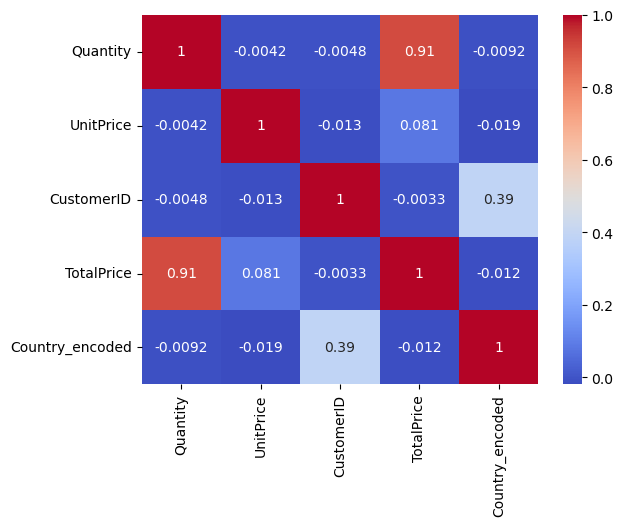

In [49]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\3821494494.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


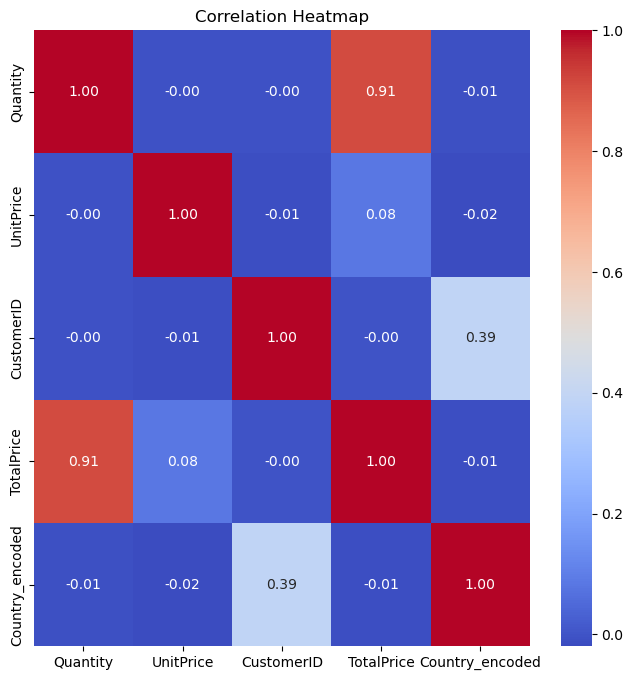

In [50]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Prepare the data for clustering (e.g., RFM analysis: Recency, Frequency, Monetary)
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(df['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)


In [53]:

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)


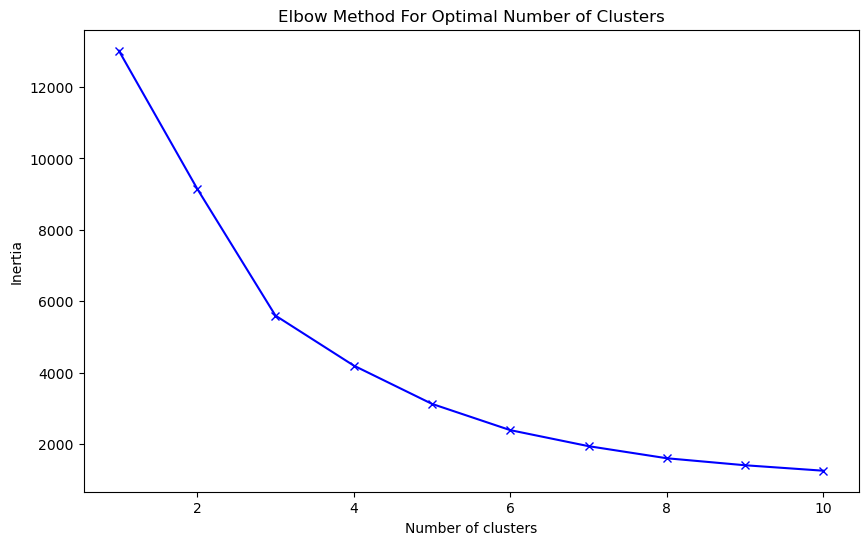

In [54]:

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [72]:

# Apply K-Means clustering with the chosen number of clusters
optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the clustered data
rfm_df.head()
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,0.458146,3
12347.0,1,116,0.018555,0
12348.0,74,20,0.008309,0
12349.0,18,45,0.007179,0
12350.0,309,9,0.001034,1


In [56]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns


Index(['InvoiceNo'], dtype='object')

In [57]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Country_encoded
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,0.000091,35
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,0.000121,35
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,0.000131,35
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,0.000091,35
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,0.000151,35
...,...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,0.000093,13
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,0.000099,13
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,0.000061,13
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,0.000075,13


In [58]:
df.drop(columns= [ 'InvoiceNo'], inplace=True)

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\1068287359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= [ 'InvoiceNo'], inplace=True)


In [223]:
#df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])


C:\Users\douaa\AppData\Local\Temp\ipykernel_7696\3904989600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])


In [59]:
timestamp_columns = df.select_dtypes(include=['datetime', 'datetimetz']).columns

for column in timestamp_columns:
  df[column] = df[column].apply(lambda x: x.timestamp())

C:\Users\douaa\AppData\Local\Temp\ipykernel_6848\2105152547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: x.timestamp())


In [53]:
#df.drop(columns= [ 'Description'], inplace=True)

In [60]:
df

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Country_encoded
0,6,1.291192e+09,2.55,17850.0,0.000091,35
1,6,1.291192e+09,3.39,17850.0,0.000121,35
2,8,1.291192e+09,2.75,17850.0,0.000131,35
5,2,1.291192e+09,7.65,17850.0,0.000091,35
6,6,1.291192e+09,4.25,17850.0,0.000151,35
...,...,...,...,...,...,...
541901,8,1.323435e+09,1.95,12680.0,0.000093,13
541903,4,1.323435e+09,4.15,12680.0,0.000099,13
541904,12,1.323435e+09,0.85,12680.0,0.000061,13
541905,6,1.323435e+09,2.10,12680.0,0.000075,13


In [231]:
#for col in df.select_dtypes(include=['period']):
#    df[col] = df[col].astype('int64')

NotImplementedError: 

In [63]:
rfm_scaled

array([[ 2.33485829, -0.43308065, 10.82748121],
       [-0.90519931,  0.45576561,  0.22792498],
       [-0.17518634, -0.28622779, -0.01913592],
       ...,
       [-0.84519825, -0.35578967, -0.19582472],
       [-0.88519896,  1.39871555, -0.09415817],
       [-0.49519203, -0.10072944, -0.04404554]])

In [64]:
df.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'TotalPrice',
       'Country_encoded'],
      dtype='object')

In [65]:
df.iloc[:,2]

0         2.55
1         3.39
2         2.75
5         7.65
6         4.25
          ... 
541901    1.95
541903    4.15
541904    0.85
541905    2.10
541908    4.95
Name: UnitPrice, Length: 247464, dtype: float64

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

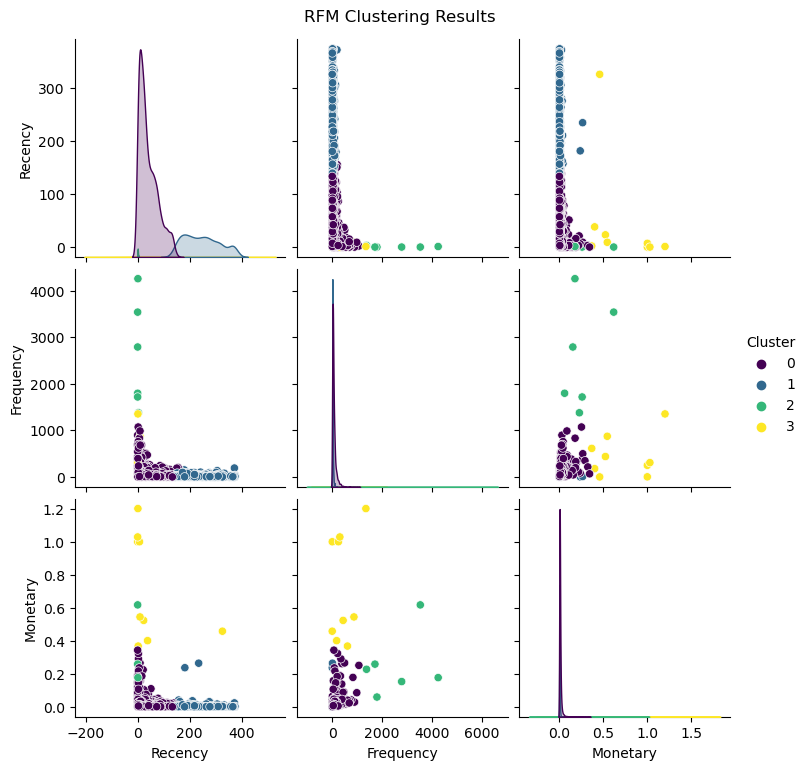

In [73]:
# Pair plot to visualize the clusters
pairplot = sns.pairplot(rfm_df, hue='Cluster', palette='viridis', diag_kind='kde')
pairplot.fig.suptitle('RFM Clustering Results', y=1.02)  # Adjust title position
plt.show()

In [75]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
rfm_centroids = pd.DataFrame(cluster_centers, columns=rfm_df.columns[:-1])
rfm_centroids['Cluster'] = range(optimal_clusters)
rfm_centroids

,Recency,Frequency,Monetary,Cluster
0,40.309898,64.363861,0.008846,0
1,246.035153,17.785384,0.002582,1
2,0.666667,2580.666667,0.248754,2
3,45.000000,446.888889,0.725050,3


In [76]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [77]:
# Convert the normalized monetary values back to actual monetary values for interpretation
rfm_df[['Recency', 'Frequency', 'Monetary']] = scaler.inverse_transform(rfm_scaled)

Text(0.5, 1.0, 'Recency Distribution by Cluster')

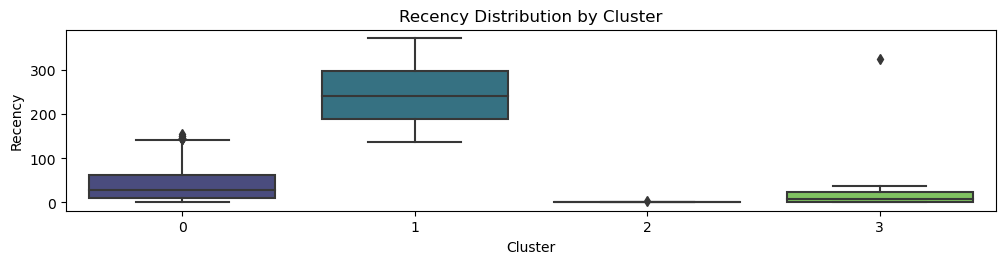

In [79]:
# Box plots to understand the distribution of RFM values within each cluster
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm_df, palette='viridis')
plt.title('Recency Distribution by Cluster')


Text(0.5, 1.0, 'Frequency Distribution by Cluster')

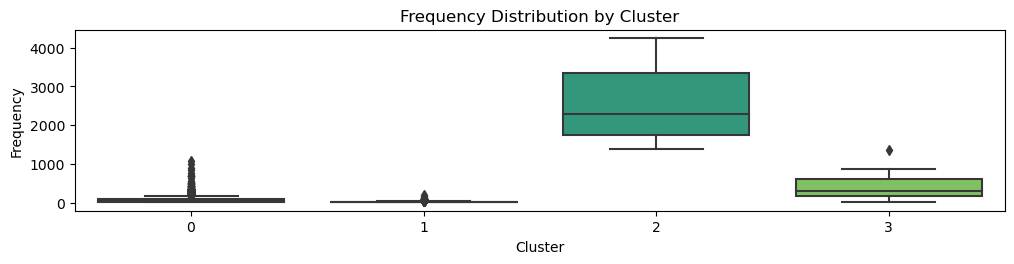

In [82]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, palette='viridis')
plt.title('Frequency Distribution by Cluster')

Text(0.5, 1.0, 'Monetary Distribution by Cluster')

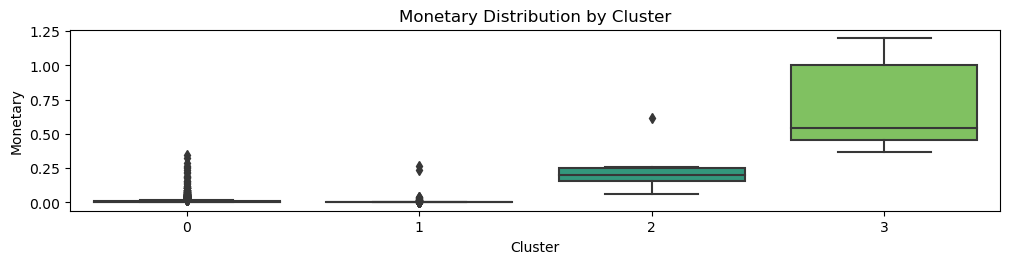

In [83]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, palette='viridis')
plt.title('Monetary Distribution by Cluster')

In [86]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
# Perform feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [88]:
# Define the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward') 

In [89]:
# Fit the model and obtain cluster labels
#cluster_labels = agg_clustering.fit_predict(df_scaled)

MemoryError: Unable to allocate 228. GiB for an array with shape (30619091916,) and data type float64

C:\Users\douaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\douaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\douaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


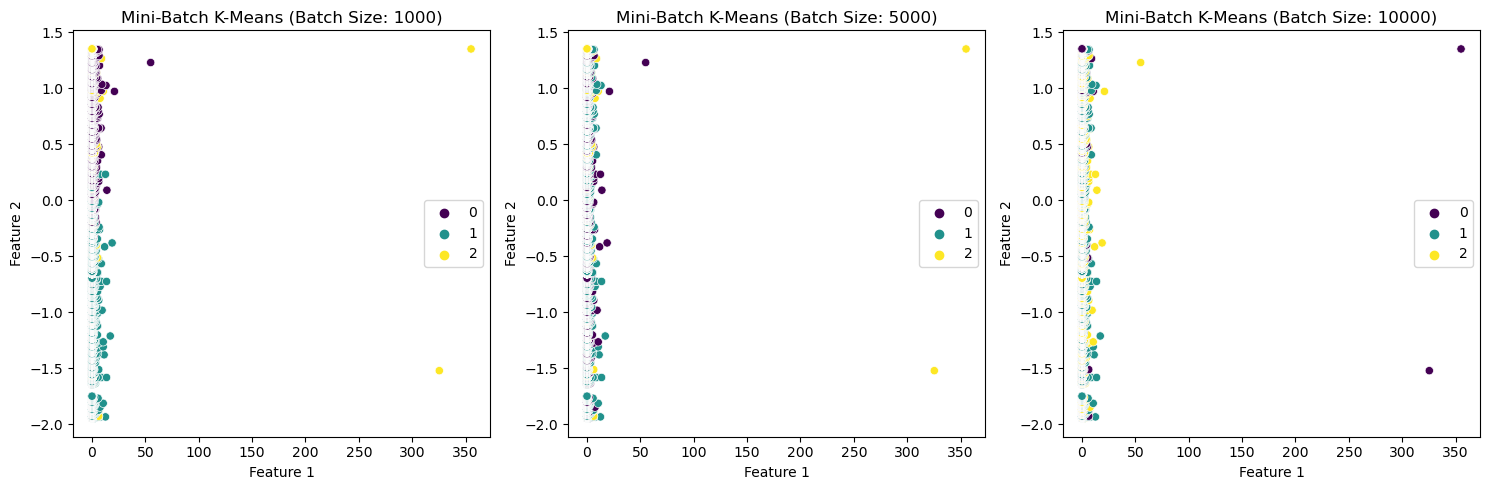

In [101]:
# Define batch sizes to try
batch_sizes = [1000, 5000, 10000] 

plt.figure(figsize=(15, 5))

# Iterate over batch sizes
for i, batch_size in enumerate(batch_sizes, 1):
    # Define the MiniBatchKMeans model with the current batch size
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=batch_size, random_state=42)
    
    # Fit the model and obtain cluster labels
    cluster_labels = mini_batch_kmeans.fit_predict(df_scaled)
    
    # Visualize the clusters
    plt.subplot(1, len(batch_sizes), i)
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=cluster_labels, palette='viridis', legend='full')
    plt.title(f'Mini-Batch K-Means (Batch Size: {batch_size})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

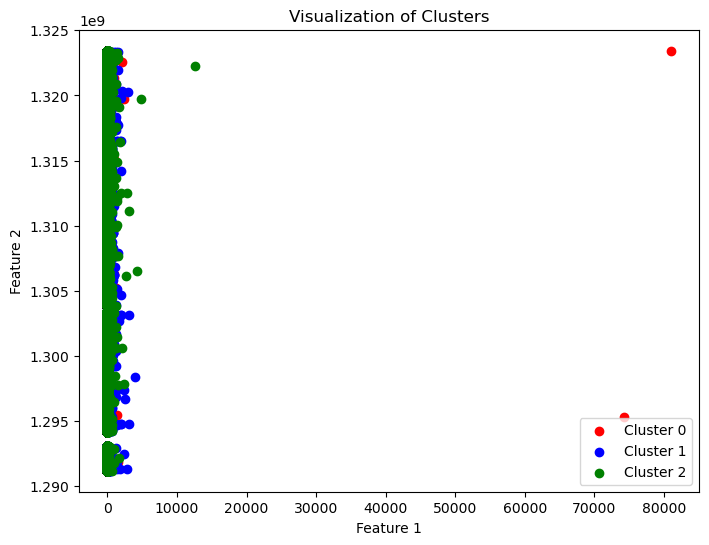

In [104]:
# Determine the unique cluster labels
unique_clusters = np.unique(cluster_labels)

# Set up colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Plot each cluster separately
plt.figure(figsize=(8, 6))
for i, cluster_label in enumerate(unique_clusters):
    # Filter data points belonging to the current cluster
    cluster_indices = cluster_labels == cluster_label
    cluster_data = df[cluster_indices]
    
    # Plot data points of the current cluster
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[i % len(colors)], label=f'Cluster {cluster_label}')

# Customize the plot
plt.title('Visualization of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

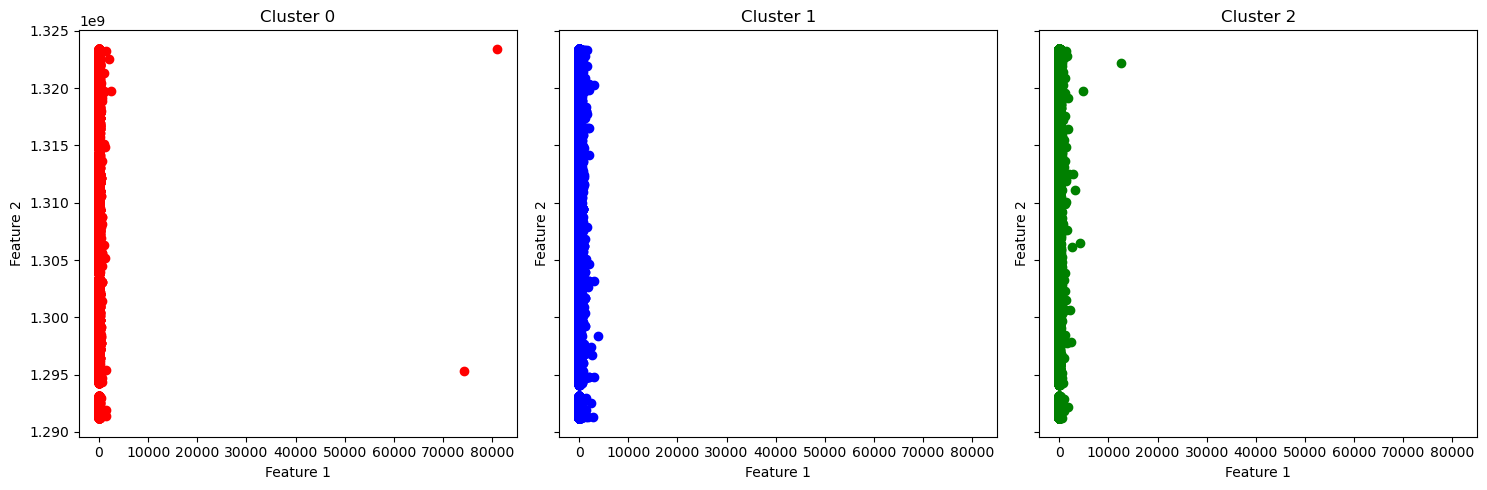

In [133]:
# Determine the unique cluster labels
unique_clusters = np.unique(cluster_labels)

# Set up colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Create subplots for each cluster
fig, axes = plt.subplots(1, len(unique_clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plot each cluster separately
for i, cluster_label in enumerate(unique_clusters):
    # Filter data points belonging to the current cluster
    cluster_indices = cluster_labels == cluster_label
    cluster_data = df[cluster_indices]
    
    # Plot data points of the current cluster
    axes[i].scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[i % len(colors)])
    axes[i].set_title(f'Cluster {cluster_label}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

# Customize the plot
plt.tight_layout()
plt.show()

In [141]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score
silhouette_avg = silhouette_score(df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate within-cluster sum of squares (WCSS)
kmeans.inertia_ 
print("Within-Cluster Sum of Squares (WCSS):", kmeans.inertia_)

Silhouette Score: -0.027745380495564624
Within-Cluster Sum of Squares (WCSS): 4194.905137881254


In [132]:
import numpy as np

# Calculate z-scores for each feature in the DataFrame
z_scores = (df - df.mean()) / df.std()

# Define threshold for z-score
threshold = 100  # Adjust as needed

# Find outliers based on z-score threshold
outlier_indices = np.where((np.abs(z_scores) > threshold).any(axis=1))[0]

# Remove outliers from the DataFrame
df_filtered = df.reset_index(drop=True).drop(outlier_indices)

# Print number of outliers removed
print(f"Number of outliers removed: {len(outlier_indices)}")

Number of outliers removed: 100


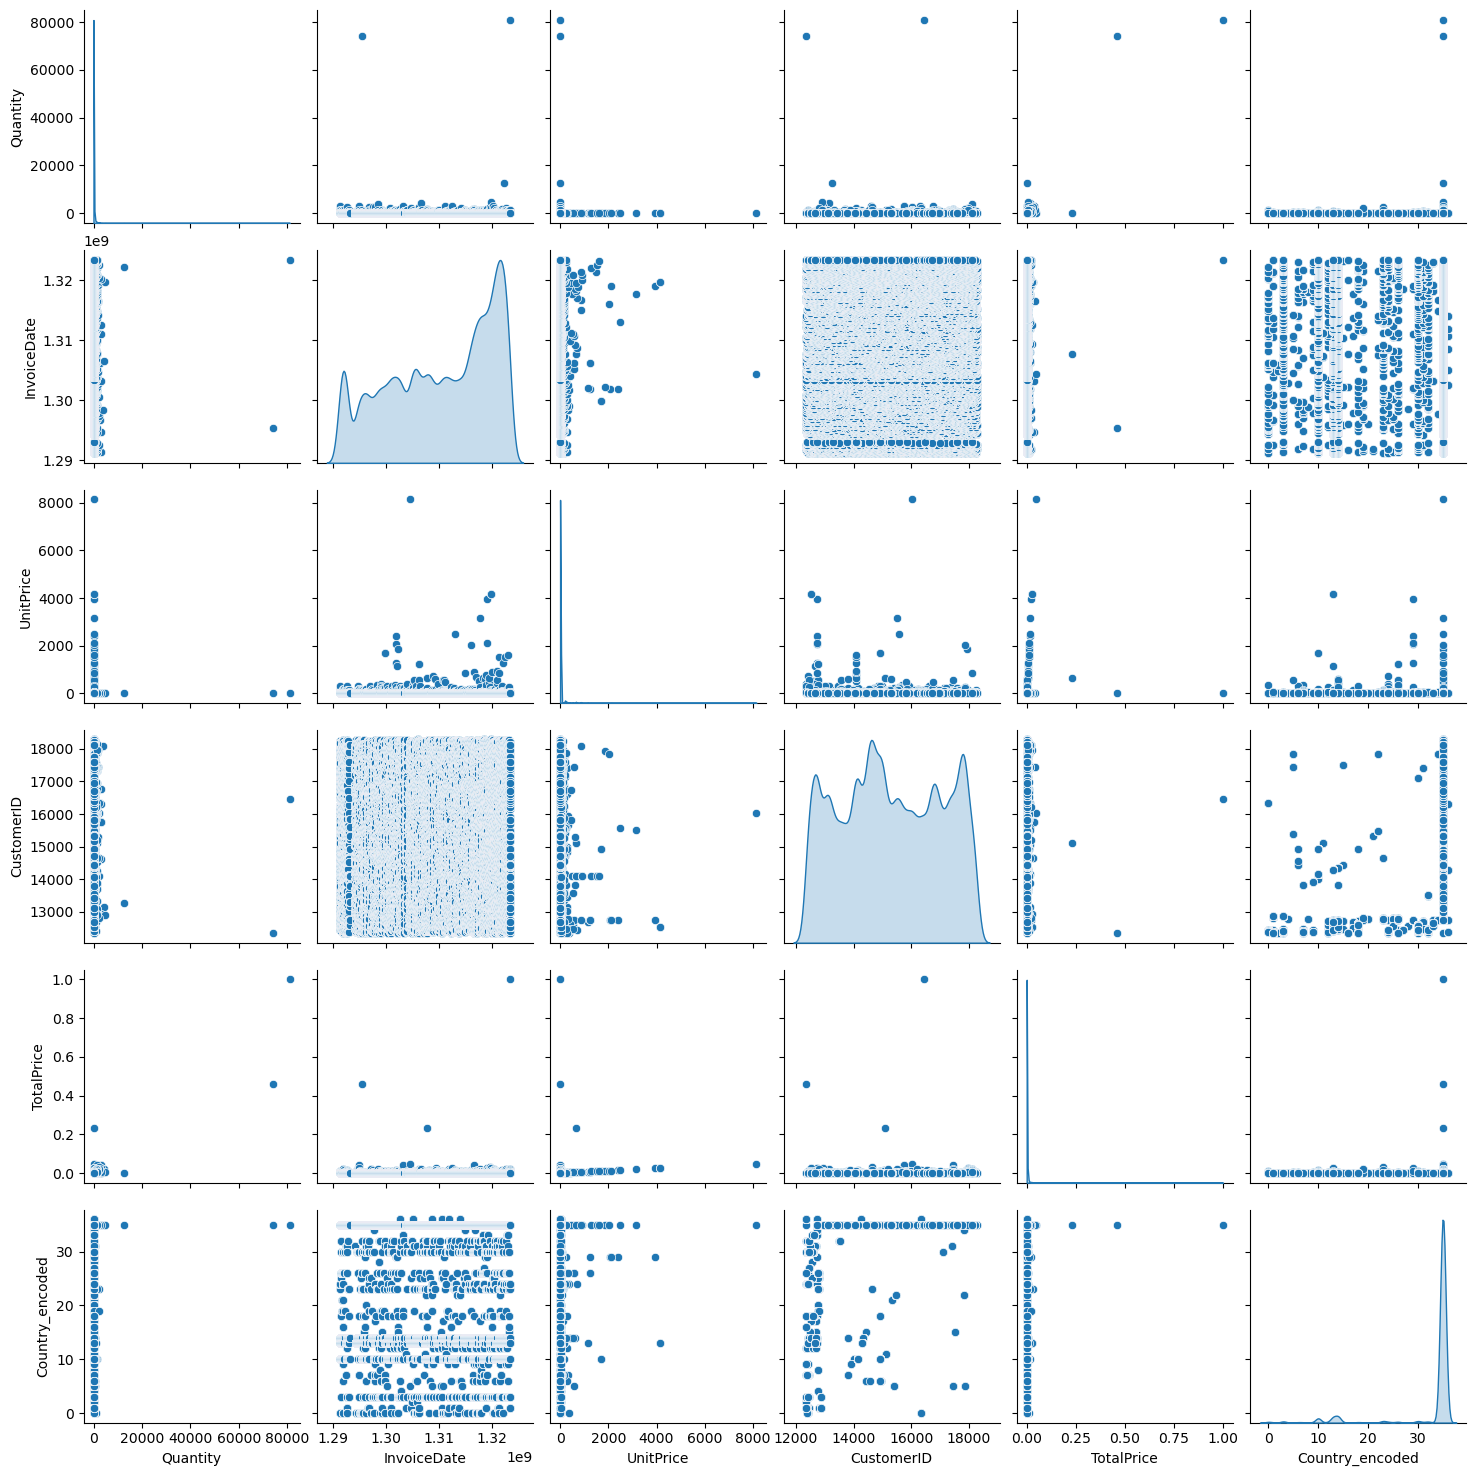

In [136]:
sns.pairplot(df, diag_kind='kde')
plt.show()

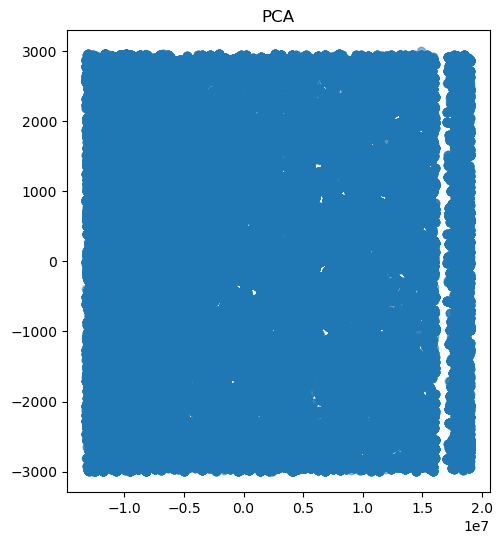

In [139]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)



# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA')

plt.show()